In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Function to generate realizations:
def euler_sde(F, dt, x0, nsim, T, sigma=1.0):
    tvec = np.arange(0, T, dt)
    nt = tvec.shape[0]
    X = np.zeros((nsim, nt))
    X[:, 0] = x0
    for ii in range(1, nt):
        X[:, ii] = X[:, ii-1] + F(X[:, ii-1]) * dt + np.sqrt(dt)*sigma*np.random.randn(nsim)

    return tvec, X


### Illustration of the Brownian Motion

In [5]:
dt = 1e-2
T = 5.0
nsim = 10
sigma = .1
x0 = np.zeros(nsim)

F = lambda x: np.zeros(x.shape)
tvec, BX = euler_sde(F, dt, x0, nsim, T, sigma=sigma)

Text(0.5, 0, '$t$')

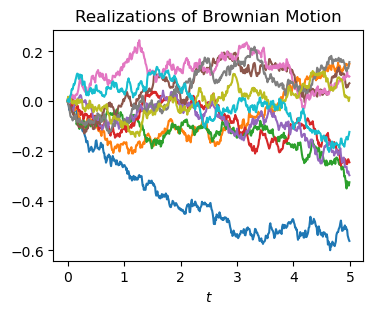

In [6]:
plt.figure(figsize=(4, 3))
plt.plot(tvec, BX.T)
plt.title("Realizations of Brownian Motion")
plt.xlabel(r"$t$")

### Linear SDE (Ornstein-Uhlenbeck Process)
$$ dX_t = -\alpha X_t \,\mathrm{d}t + \sigma \,\mathrm{d}B_t $$

In [14]:
dt = 1e-2
T = 50.0
alpha = 1.0
nsim = 200
sigma = 1.0
x0 = 10 * np.random.rand(nsim) - 5.0

F = lambda x: -alpha * x
tvec, BX = euler_sde(F, dt, x0, nsim, T, sigma=sigma)

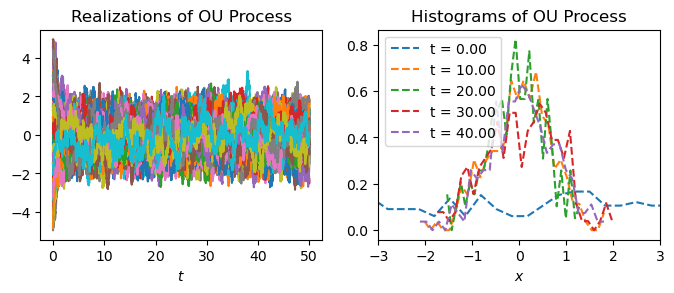

In [15]:
plt.figure(figsize=(8, 6))

plt.subplot(2, 2, 1)
plt.plot(tvec, BX.T)
plt.title("Realizations of OU Process")
plt.xlabel(r"$t$")

plt.subplot(2, 2, 2)
nhist = 5
for ii in range(0, tvec.shape[0], int(tvec.shape[0]/nhist)):
    h, be = np.histogram(BX[:, ii], bins=30, density=True)
    bc = 0.5*(be[1:] + be[:-1])
    plt.plot(bc, h, "--", label="t = %.2f"%tvec[ii])
plt.title("Histograms of OU Process")
plt.xlabel(r"$x$")
plt.xlim([-3, 3])
plt.legend(loc=2)

### Illustration of Gradient Flow SDE
$$ dX_t = -V'(X_t) \,\mathrm{d}t + \sigma \,\mathrm{d}B_t $$
$$ V(x) = (x^2 - 1)^2 $$

In [25]:
dt = 1e-2
T = 100.0
nsim = 300
sigma = 2.0

x0 = 10 * np.random.rand(nsim) - 5.0

F = lambda x: -4 * (x**2 - 1.0) * x
tvec, BX = euler_sde(F, dt, x0, nsim, T, sigma=sigma)
print(BX.shape)

(300, 10000)


(-3.0, 3.0)

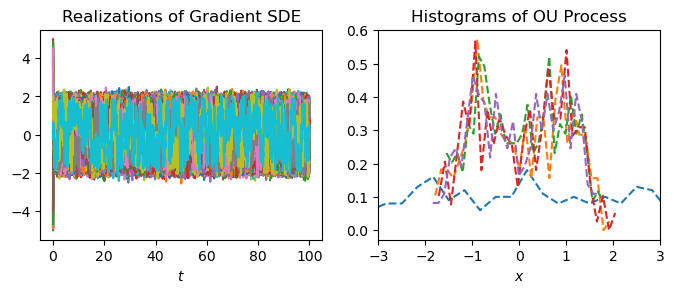

In [26]:
plt.figure(figsize=(8, 6))

plt.subplot(2, 2, 1)
plt.plot(tvec, BX.T)
plt.title("Realizations of Gradient SDE")
plt.xlabel(r"$t$")

plt.subplot(2, 2, 2)
nhist = 5
for ii in range(0, tvec.shape[0], int(tvec.shape[0]/nhist)):
    h, be = np.histogram(BX[:, ii], bins=30, density=True)
    bc = 0.5*(be[1:] + be[:-1])
    plt.plot(bc, h, "--", label="t = %.2f"%tvec[ii])
plt.title("Histograms of OU Process")
plt.xlabel(r"$x$")
plt.xlim([-3, 3])
# plt.legend(loc=2)